In [1]:
## Preliminary

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install mitosheet 
import mitosheet 

!pip install xgboost
import xgboost

%config InlineBackend.figure_format = "svg"

In [3]:
df = pd.read_csv('../datasets/train.csv')

In [4]:
# Remove irrelevant columns

In [5]:
# Deleted columns property_id
df.drop(['property_id'], axis=1, inplace=True)

# Deleted columns property_name
df.drop(['property_name'], axis=1, inplace=True)

# Deleted columns property_summary
df.drop(['property_summary'], axis=1, inplace=True)

# Deleted columns property_space
df.drop(['property_space'], axis=1, inplace=True)

# Deleted columns property_desc
df.drop(['property_desc'], axis=1, inplace=True)

# Deleted columns property_neighborhood
df.drop(['property_neighborhood'], axis=1, inplace=True)

# Deleted columns property_notes
df.drop(['property_notes'], axis=1, inplace=True)

# Deleted columns property_transit
df.drop(['property_transit'], axis=1, inplace=True)

# Deleted columns property_access
df.drop(['property_access'], axis=1, inplace=True)

# Deleted columns property_interaction
df.drop(['property_interaction'], axis=1, inplace=True)

# Deleted columns property_rules
df.drop(['property_rules'], axis=1, inplace=True)

# Deleted columns property_sqfeet
df.drop(['property_sqfeet'], axis=1, inplace=True)

# Deleted columns property_scraped_at
df.drop(['property_scraped_at'], axis=1, inplace=True)

# Deleted columns property_last_updated
df.drop(['property_last_updated'], axis=1, inplace=True)

# Deleted columns host_id
df.drop(['host_id'], axis=1, inplace=True)

# Deleted columns host_location
df.drop(['host_location'], axis=1, inplace=True)

# Deleted columns host_about
df.drop(['host_about'], axis=1, inplace=True)

# Deleted columns host_nr_listings_total
df.drop(['host_nr_listings_total'], axis=1, inplace=True)

# Deleted columns host_verified
df.drop(['host_verified'], axis=1, inplace=True)

# Deleted columns booking_max_nights
df.drop(['booking_max_nights'], axis=1, inplace=True)

# Deleted columns reviews_first
df.drop(['reviews_first'], axis=1, inplace=True)

# Deleted columns reviews_last
df.drop(['reviews_last'], axis=1, inplace=True)

In [6]:
# Transform target to logarithm (target)
df['target'] = np.log(df['target'])

In [7]:
# Remove target outliers
Q1_target = df['target'].quantile(0.25)
Q3_target = df['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

df = df[(df['target'] >= lower_bound_target) & (df['target'] <= upper_bound_target)]

In [8]:
# Check for missing values
df['property_max_guests'].isna().sum()

0

In [9]:
# Remove property_max_guests outliers
Q1_guests = df['property_max_guests'].quantile(0.25)
Q3_guests = df['property_max_guests'].quantile(0.75)
IQR_guests = Q3_guests - Q1_guests

lower_bound_guests = Q1_guests - 1.5 * IQR_guests
upper_bound_guests = Q3_guests + 1.5 * IQR_guests

df = df[(df['property_max_guests'] >= lower_bound_guests) & (df['property_max_guests'] <= upper_bound_guests)]

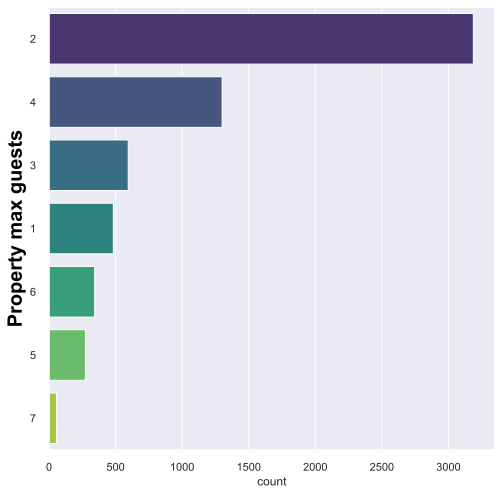

In [10]:
# Plot frequencies of each property_max_guests
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y = 'property_max_guests',data = df,order = df['property_max_guests'].value_counts().index,palette = "viridis")
plt.ylabel('Property max guests',fontsize = 20, weight = 'bold',color='black')
#plt.axes().set(facecolor = "White")
plt.show()

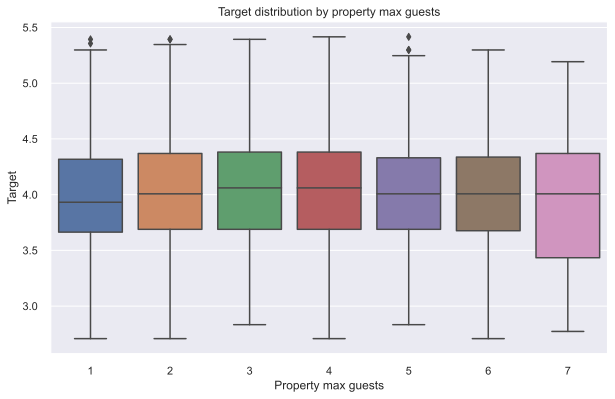

In [11]:
# Generate the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='property_max_guests', y='target', data=df)
ax.set_title('Target distribution by property max guests')
ax.set_xlabel('Property max guests')
ax.set_ylabel('Target')
plt.show()

In [12]:
# Create a correlation table
corr_table_maxguests = df[['target', 'property_max_guests']].corr()
print(corr_table_maxguests)

                       target  property_max_guests
target               1.000000             0.011521
property_max_guests  0.011521             1.000000


In [13]:
from scipy.stats import pearsonr

# calculate the correlation and p-value
corr, p = pearsonr(df['property_max_guests'], df['target'])
print(f'Correlation: {corr:.2f}, p-value: {p:.2f}')

if p < 0.05:
    print('The correlation is significant')
else:
    print('The correlation is not significant')

Correlation: 0.01, p-value: 0.36
The correlation is not significant


In [14]:
# Check correlation with similar attributes
corr_table = df[['property_max_guests', 'property_bathrooms', 'property_bedrooms', 'property_beds', 'target']].corr()

print(corr_table)


                     property_max_guests  property_bathrooms  \
property_max_guests             1.000000            0.184031   
property_bathrooms              0.184031            1.000000   
property_bedrooms               0.593669            0.270760   
property_beds                   0.752271            0.183273   
target                          0.011521           -0.017148   

                     property_bedrooms  property_beds    target  
property_max_guests           0.593669       0.752271  0.011521  
property_bathrooms            0.270760       0.183273 -0.017148  
property_bedrooms             1.000000       0.610617  0.004738  
property_beds                 0.610617       1.000000  0.004828  
target                        0.004738       0.004828  1.000000  


In [15]:
# Calculate correlation coefficients between property_max_guests and all other numerical columns
corr_matrix = df.corr()
corr_with_max_guests = corr_matrix['property_max_guests'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(corr_with_max_guests)

# Select columns with absolute correlation coefficient greater than 0.5
collinear_cols = corr_with_max_guests[corr_with_max_guests > 0.5].index.tolist()

# Print the collinear columns
print("The following columns are collinear with property_max_guests:")
for col in collinear_cols:
    print(col)

property_max_guests         1.000000
property_beds               0.752271
property_bedrooms           0.593669
booking_price_covers        0.474031
property_bathrooms          0.184031
host_nr_listings            0.093712
reviews_value               0.056974
booking_availability_365    0.055565
reviews_num                 0.055425
reviews_cleanliness         0.051431
host_response_rate          0.049755
property_lon                0.044080
reviews_rating              0.037285
reviews_acc                 0.037279
reviews_communication       0.029083
reviews_location            0.022463
booking_min_nights          0.019498
reviews_checkin             0.019158
target                      0.011521
reviews_per_month           0.008147
property_lat                0.007943
booking_availability_60     0.003525
booking_availability_90     0.003311
booking_availability_30     0.000378
Name: property_max_guests, dtype: float64
The following columns are collinear with property_max_guests:
property

In [16]:
# Remove property_beds and property_bedrooms
df.drop(['property_beds'], axis=1, inplace=True)
df.drop(['property_bedrooms'], axis=1, inplace=True)

In [17]:
# Because of the reasons highlighted in this EDA, we have decided to NOT remove property_max_guest
# as an attribute from our training set. BUT, we will remove property_beds and property_bedrooms because of collinearity